---
title: Graviational Waves
author:
  - name: Binh Nguyen
    affiliations: Universite Paris Saclay
    email: yenbinhpy308@gmail.com
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Parameters
fs = 4096
T = 1.0
t = np.linspace(0, T, int(fs*T))

# Physical constants
G = 6.67430e-11
c = 3e8
M_sun = 1.988e30
m1 = 30

# Chirp mass
def M_chirp(m1, m2):
    return (m1 * m2)**(3/5) / (m1 + m2)**(1/5)

mc = M_chirp(m1, m1)  # example: 30 Msun + 30 Msun

# Inspiral frequency
t_c = 1.0
t_m = 0.97

f_low = 20
t_low = 0.05

def f_inspiral(t_i, t_c, mc):
    dt = t_c - t_i
    if dt <= 0:
        dt = 1e-6   # avoid division by zero
    s = G * mc * M_sun / c**3
    tau = 5/(256 * dt)
    return (1/np.pi) * tau**(3/8) * s**(-5/8)

def f_merge(m1, m2):
    m = (m1 + m2) * M_sun
    a = c**3 / (G * m)
    return a / ( (6**(3/2)) * np.pi )
    
# Compute frequency array
f_GW = np.zeros_like(t)
for i in range(len(t)):
    f_GW[i] = f_inspiral(t[i], t_c, mc)

# Compute the merging frequency
f_m = f_merge(m1, m1)

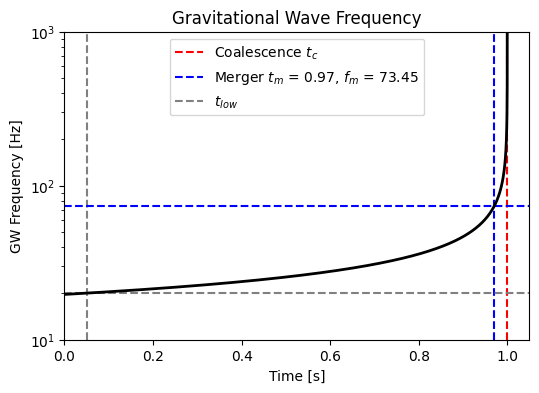

In [4]:
#| label: GW_freq
plt.figure(figsize=(6,4))
plt.yscale("log")
# plt.xscale("log")
plt.axvline(t_c, color='red', linestyle='--', label=r'Coalescence $t_c$')
plt.axvline(t_m, color='blue', linestyle='--', label=fr'Merger $t_m$ = {t_m}, $f_m$ = {f_m:.2f}')
plt.axvline(t_low, color='gray', linestyle='--', label=r'$t_{low}$')

plt.axhline(f_m, color='blue', linestyle='--')
plt.axhline(f_low, color='gray', linestyle='--')

plt.plot(t, f_GW, lw=2, color='black')

plt.xlabel("Time [s]")
plt.ylabel("GW Frequency [Hz]")
plt.title("Gravitational Wave Frequency")
plt.xlim(0, 1.05)
plt.ylim(10, 1e3)
plt.legend()
plt.show()